In [1]:
from pyeasyga import pyeasyga
from sumolib import checkBinary
import xml.etree.ElementTree as ET
import traci
import sys

In [2]:
def simulate(program):
    traci.start([checkBinary(program), "-c", "sumo/light.sumocfg", "--tripinfo-output", "sumo/tripinfo.xml"])
    
    while traci.simulation.getMinExpectedNumber() > 0:
        traci.simulationStep()
        
    traci.close()
    sys.stdout.flush()
    
    xmldoc = ET.parse('sumo/tripinfo.xml')

    tripinfos = xmldoc.findall('tripinfo')

    waitingTime = 0
    for tripinfo in tripinfos:
        waitingTime += float(tripinfo.get('waitingTime'))
        
    return waitingTime

In [3]:
def display(phenotype):
    network = ET.parse('sumo/light.net.xml')
    signal = network.find('tlLogic')
    phases = signal.findall('phase')
    
    for i in range(4):
        phases[i].set("duration", str(phenotype[2*i]))
        phases[i].set("state", phenotype[2*i+1])

    network.write("sumo/light.net.xml")

    return simulate('sumo-gui')

In [5]:
default = [42, 'GGGGgrrrrrGGGGgrrrrr', 3, 'yyyyyrrrrryyyyyrrrrr', 42, 'rrrrrGGGGgrrrrrGGGGg', 3, 'rrrrryyyyyrrrrryyyyy']
display(default)

242.9

In [6]:
data = [0] * 188
ga = pyeasyga.GeneticAlgorithm(data)
ga.generations =  10
ga.population_size = 20

fitnesses = []

In [7]:
def phenotype(genotype):
    phenotype = []
    m = ['G', 'g', 'y', 'r']
    
    for j in range(4):
        phenotype.append(int(''.join(map(str,genotype[:7])),2)) 

        state = genotype[7:47]
        s = ""
        for i in range(0, 20):
            s += m[int(str(state[2*i])+str(state[2*i+1]),2)]
        phenotype.append(s)

        genotype = genotype[47:]
    
    return phenotype

In [8]:
def fitness(individual, data):
    
    individual = phenotype(individual)

    network = ET.parse('sumo/light.net.xml')
    signal = network.find('tlLogic') 
    
    i = 0
    for phase in signal.iter('phase'):
        duration = str(individual[2*i])
        if duration == "0":
             return 0
        state = individual[2*i+1]
        phase.set("duration", duration)
        phase.set("state", state)
        i += 1

    network.write("sumo/light.net.xml")
    
    waitingTime = simulate('sumo')
    
    fitnesses.append(waitingTime)
          
    print(waitingTime, individual)
    
    return 1/waitingTime

ga.fitness_function = fitness

In [9]:
ga.run()

3670.4999999999995 [44, 'grgrrGyGrygrrgGrryrg', 78, 'GGgGrgyyGyyGgygryyrG', 2, 'GygggygyygyGrrGrrggy', 65, 'gygyyyyGryGGyrGyygGr']
8324.5 [41, 'yyyygGgyrrryyyygGrrg', 116, 'ygrGGgyGrryyrGgyygrg', 95, 'ygggggGgGgrGyyygGGrG', 90, 'yyGGgyGyggyggrGGrgGy']
2037.0 [112, 'GGrgGrrGGryyrgggyGyy', 30, 'rGGgrgyGgrGyggggyryG', 65, 'ggGGyGGygyygGryggggr', 110, 'GyyyGygyrgggrrGGGGyy']
565.6999999999999 [52, 'GrGggggrgyyGrgyryGyG', 96, 'GGrryyyyggGgGGrGrgGr', 50, 'yrgrrrGGGyGrrrGyrGgG', 82, 'ygyryrrGyryyGGGGyyyr']
2417.7000000000003 [116, 'ggGyGGGggygrrrgrgGrr', 68, 'yyGGgyGgGrrrGgygyygr', 53, 'yggGyryygGrGGryGgGGg', 26, 'rgrgygyggGryrgyyrGGG']
521.6 [1, 'yggGgGrGgrrGgGgGrrry', 83, 'grGyGyyyGgrGGgGrgGyg', 51, 'GGGygGygGgrggrGgGygy', 68, 'yrGyGygyyyggrggGryrG']
2295.6000000000004 [85, 'ryryygryrrggGgygrrgy', 39, 'grrrgyrggygGygGyGgyG', 31, 'gyrGyrGgryGGygyrGrrg', 110, 'rgyrGgGyGGyyGyygggrG']
4381.099999999999 [10, 'yrrrrrgGrgrGyggGgrGr', 121, 'rGgrGGGrgyrgyrryrGGG', 85, 'gyrGyggggGryyryrGggr', 62, 'gy

84.59999999999998 [26, 'GGrgrrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgGgyryrgrygyGgryyGg', 68, 'GGrryrgGyyGgrggGryry']
65.3 [26, 'GGrggrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgGgyryrgryGggggrgGG', 99, 'GyGygGrgyrGrygrryyrG']
74.09999999999998 [26, 'GGrgrrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGgGrGGr', 48, 'GgGgyryrgryGggggrgGG', 99, 'GyGygGrgyrGGgrGrygrr']
84.59999999999998 [26, 'GGrgrrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 16, 'GgGgyryGGyGrrrGyrGgG', 82, 'ygyryrrGyryyGGGGyryg']
84.59999999999998 [26, 'GGrgrrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgGgyryrgrygyGgryyGg', 68, 'GGrryrgGyyGyGGGgygyg']
84.59999999999998 [26, 'GGrgrrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgGgyryGGyGrrrGyrGgG', 82, 'ygyryrrGyryyGGGGyryg']
84.59999999999998 [26, 'GGrgrrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgGgyryrgrygyGgryyGg', 68, 'GGrryrgGyyGgrggGryrG']
84.59999999999998 [26, 'GGrgrrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgGgyryrgrygyGgr

65.3 [26, 'GGrggrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgygyryrgryGggggrgGG', 99, 'GyGygGrgyrGGgrGrryrG']
65.3 [26, 'GGrggrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgygyryrgryGggggrgGG', 99, 'GyGygGrgyrGGgrGrryrG']
65.3 [26, 'GGrggrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgygyryrgryGggggrgGG', 99, 'GyGygGrgyrGgrggGryrG']
65.3 [26, 'GGrggrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgGgyryrgryGggggrgGG', 99, 'GygygGrgyrGrygrryyrG']
65.3 [26, 'GGrggrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgygyryrgryGggggrgGG', 99, 'GyGygGrgyrGGgrGrygrr']
65.3 [26, 'GGrggrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgGgyryrgryGggggrgGG', 99, 'GyGygGrgyrGrygrryyry']
61.3 [24, 'GGrggrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgGgyryrgryGggggrgGG', 99, 'GyGygGrgyrGGgrGrygrr']
65.3 [26, 'GGrggrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggrGGr', 48, 'GgGgyryrgryGggggrgGG', 99, 'GyGygGrgyrGrygrryyry']
65.3 [26, 'GGrggrrrygryyGgGyrgG', 87, 'GgGggrGGGgGryGggr

In [10]:
best = phenotype(ga.best_individual()[1])

[84.59999999999998, 84.59999999999998, 65.3, 65.3, 65.3, 65.3, 61.3, 61.3, 61.3, 59.00000000000001]
[2591.485, 778.28, 165.54, 122.33499999999998, 71.88999999999999, 65.3, 64.89999999999999, 63.9, 61.699999999999996, 99.7421052631579]
[2510.6770177898024, 796.2656397538648, 167.9039650326466, 189.56450998899666, 8.288920950661531, 0.0, 1.2311740225021848, 1.9574419397183715, 1.231174022502185, 168.12304791362214]


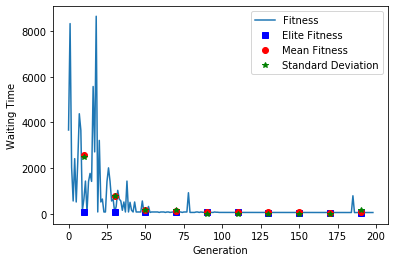

In [11]:
from statistics import mean, stdev
import matplotlib.pyplot as plt
import numpy as np

generation_fitnesses = []
elite_fitnesses = []
mean_fitnesses = []
stdev_fitnesses = []

for i in range(ga.generations):
    generation_fitnesses.append(fitnesses[ga.population_size*i:(ga.population_size)*(i+1)])

for i in range(ga.generations):
    elite_fitnesses.append(min(generation_fitnesses[i]))
    mean_fitnesses.append(mean(generation_fitnesses[i]))
    stdev_fitnesses.append(stdev(generation_fitnesses[i]))
    
print(elite_fitnesses)
print(mean_fitnesses)
print(stdev_fitnesses)


plt.plot(fitnesses, label='Fitness')
t = np.linspace(ga.population_size/2, (ga.population_size/2)*(2*ga.generations-1), ga.generations)
plt.plot(t, elite_fitnesses,'bs', label='Elite Fitness')
plt.plot(t, mean_fitnesses, 'ro', label='Mean Fitness')
plt.plot(t, stdev_fitnesses, 'g*', label='Standard Deviation')

plt.xlabel('Generation')
plt.ylabel('Waiting Time')
plt.legend()
plt.show()

In [12]:
# Best individual, after 10 generations each with a population of 20 individuals
display(best)

59.00000000000001

In [16]:
# Best so far, after 30 generations each with a population of 50 individuals
best_so_far = [43, 'GGGrGgrGrgGGyyGGgGyy', 11, 'GgyGGyGyrgggrGGGGGrr', 38, 'GgGGgGrgyyGGgyygGryr', 78, 'yrrGgryyrrgGyGrGyggG']
display(best_so_far)

4.1